# One and Two Parameter Analytic Fit Equations

See prelab 08 for derivations of the one parameter equations below

In [1]:
%reset -f
import data_entry2
import matplotlib.pyplot as plt
import numpy as np

""" Sample data for the code below"""
xdata = np.array([0.1, 0.16428571, 0.22857143, 0.29285714, 0.35714286, 0.42142857, 0.48571429, 0.55, \
                   0.61428571, 0.67857143, 0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.])
ydata = np.array([0.33336864, 0.5414786, 0.82003978, 1.09858314, 1.27560974, 1.52025082, 1.67681586, 2.03833678, \
                  2.35943739, 2.36120224, 2.74941308, 2.83963194, 2.9932707, 3.40978616, 3.44578725])
u_ydata = np.array([0.01666843, 0.02707393, 0.04100199, 0.05492916, 0.06378049, 0.07601254, 0.08384079, 0.10191684, \
                   0.11797187, 0.11806011, 0.13747065, 0.1419816, 0.14966353, 0.17048931, 0.17228936])


## The analytic formula for minimizing chi-squared for a one-parameter model, $y = mx$
**A weighted fit to a line with zero intercept (1-parameter fit)**

The solution for a weighted fit to the model $y=mx$ is

$$ m = \frac{1}{Z} \sum_{i=1}^N  \frac{x_iy_i}{(u\_y_i)^2}, $$

where $Z$ is a placeholder variable defined as

$$ Z = \sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}. $$

The uncertainty in the slope is given by

$$ u\_m = \sqrt{\frac{1}{Z}} .$$

### Applying the one-parameter analytic equation to the sample data

Best fit slope m =  3.545444003081639 ± 0.04581209150201686
chi2 = 0.7594


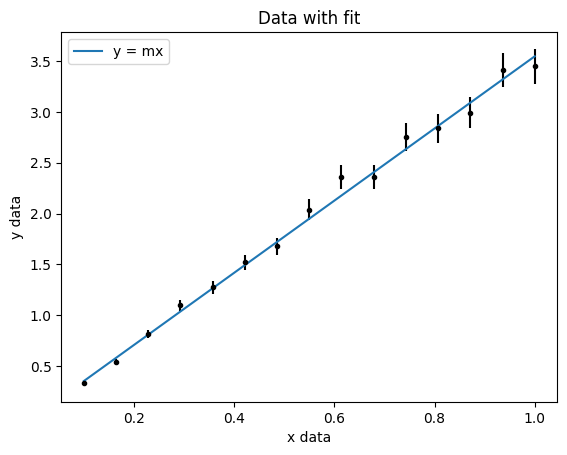

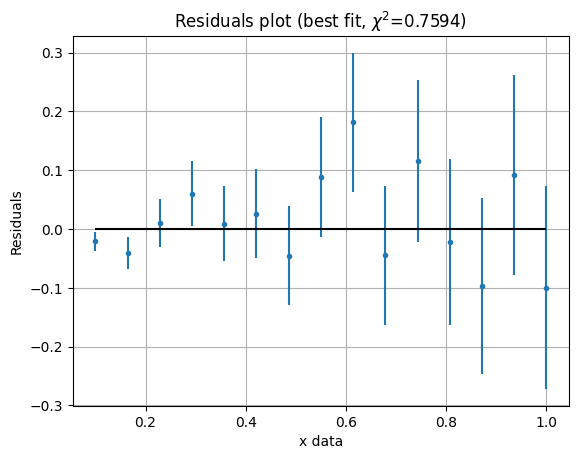

In [2]:
""" Find the best 1-parameter model corresponding to the minimized chi-squared """

# calculations for the analytic best fit here: 
Z = np.sum( (xdata * xdata) / u_ydata**2) # calculate sum(x_i*x_i/(u_y_i)^2)

# Calculate best fit slope
m = 1/Z * np.sum( xdata * ydata / u_ydata**2 )

# Calculate uncertainty in best fit slope
u_m = np.sqrt(1/Z)

# Print the best fit slope and uncertainty
print("Best fit slope m = ", m, "±", u_m)

""" Construct the model for plotting and calculating residuals """

ymodel = m * xdata # best fit model
res = ydata - ymodel # calculate residuals (best fit)
wres2 = (res/u_ydata)**2 # weighted residuals squared
    
""" Calculate chi-squared """
    
N = len(xdata) # number of data points
P = 1 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculate chi-squared
print("chi2 = {:.4f}".format(chi2))

""" Plot data and fit """

plt.errorbar(xdata, ydata, u_ydata, marker='.', linestyle='', color='k')
plt.plot(xdata, ymodel, label="y = mx")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" Plot residuals for the best fit """

plt.errorbar(xdata, res, u_ydata, marker='.', linestyle='')
plt.hlines(y=0, xmin=np.min(xdata), xmax=np.max(xdata), color='k') # draw axis at y = 0.
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()

## The analytic formula for minimizing chi-squared for a two-parameter model, $y = mx + b$
**A weighted fit to a line with a non-zero intercept (2-parameter fit)**

The solutions for a weighted fit to the model $y=mx + b$ are

$$m = \frac{1}{Z} \left(
\sum_{i=1}^N \frac{1}{(u\_y_i)^2} \cdot \sum_{i=1}^N \frac{x_i y_i}{(u\_y_i)^2} 
- \sum_{i=1}^N \frac{x_i}{(u\_y_i)^2} \cdot \sum_{i=1}^N \frac{y_i}{(u\_y_i)^2}
\right),$$

and

$$b = \frac{1}{Z} \left(
\sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2} \cdot \sum_{i=1}^N \frac{y_i}{(u\_y_i)^2} 
- \sum_{i=1}^N \frac{x_i}{(u\_y_i)^2} \cdot \sum_{i=1}^N \frac{x_i y_i}{(u\_y_i)^2}
\right),$$

where $Z$ is a placeholder variable (different from the 1-parameter version) defined as

$$ Z = \sum_{i=1}^N \frac{1}{(u\_y_i)^2} \cdot \sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}
- \left( \sum_{i=1}^N \frac{x_i}{(u\_y_i)^2} \right)^2.$$

The uncertainty in the fit parameters are given by

$$ u\_m = \sqrt{\frac{1}{Z} \sum_{i=1}^N \frac{1}{(u\_y_i)^2}},$$

and

$$ u\_b = \sqrt{\frac{1}{Z} \sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}}.$$

### Applying the two-parameter analytic equation to the sample data

Best fit slope, m =  3.631453948552925 ± 0.07036167081780782
Best fit slope, b =  -0.02976554902492313 ± 0.018481672899433168
chi2 = 0.6183


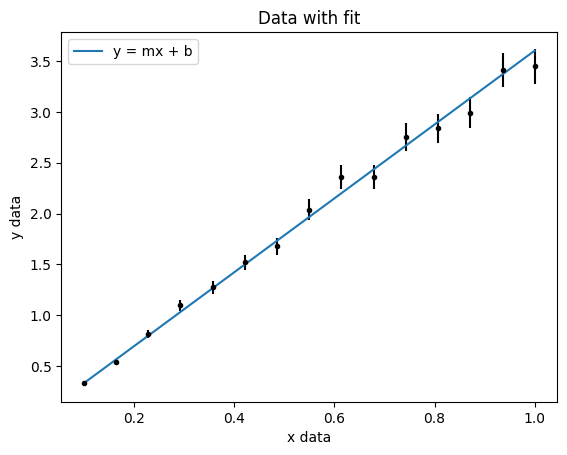

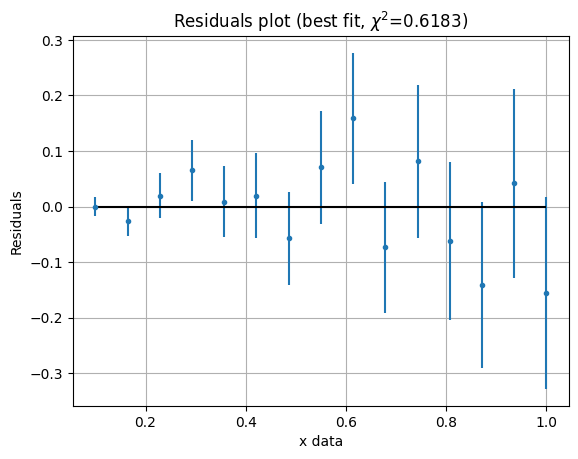

In [3]:
""" Find the best 2-parameter model corresponding to the minimized chi-squared """

# Calculate Z
Z = (
    np.sum( 1 / u_ydata**2 ) * np.sum( xdata**2 / u_ydata**2 )
    - np.sum( xdata / u_ydata**2 )**2
)

# Calculate best fit slope, m
m = 1/Z * (
    np.sum( 1 / u_ydata**2 ) * np.sum( xdata * ydata / u_ydata**2 )
    - np.sum( xdata / u_ydata**2 ) * np.sum( ydata / u_ydata**2 )
)

# Calculate best fit y-intercept, b
b = 1/Z * (
    np.sum( xdata**2 / u_ydata**2 ) * np.sum( ydata / u_ydata**2 )
    - np.sum( xdata / u_ydata**2 ) * np.sum( xdata * ydata / u_ydata**2 )
)

# Calculate uncertainty in best fit slope, u_m
u_m = np.sqrt(1/Z * np.sum( 1 / u_ydata**2 ) )

# Calculate uncertainty in best fit slope, u_b
u_b = np.sqrt(1/Z * np.sum( xdata**2 / u_ydata**2 ) )

# Print the best fit slope and uncertainty
print("Best fit slope, m = ", m, "±", u_m)

# Print the best fit y-intercept and uncertainty
print("Best fit slope, b = ", b, "±", u_b)


""" Construct the model for plotting and calculating residuals """

ymodel = m * xdata + b # best fit model
res = ydata - ymodel # calculate residuals (best fit)
wres2 = (res/u_ydata)**2 # weighted residuals squared


""" Calculate chi-squared """
    
N = len(xdata) # number of data points
P = 2 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculate chi-squared
print("chi2 = {:.4f}".format(chi2))

""" Plot data and fit """

plt.errorbar(xdata, ydata, u_ydata, marker='.', linestyle='', color='k')
plt.plot(xdata, ymodel, label="y = mx + b")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" Plot residuals for the best fit """

plt.errorbar(xdata, res, u_ydata, marker='.', linestyle='')
plt.hlines(y=0, xmin=np.min(xdata), xmax=np.max(xdata), color='k') # draw axis at y = 0.
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()